# Credit Card Fraud Detection

**Author:** Sarmad Salman

## Project Topic and Goal

**Explanation**:
- Detecting fraudulent credit card transactions using historical transaction data.

**Goal**:
- Build a model that can identify fraudulent transactions with high accuracy, helping financial institutions prevent fraud and reduce financial losses.


In [1]:
#Data Preprocessing
pip install pandas scikit-learn matplotlib seaborn imbalanced-learn

import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('C:/Users/sarma/Desktop/MS-CS CU/Problems sets/ML/ML Supervised/creditcard.csv')

# Display basic info
print(df.info())
print(df.describe())

# Feature scaling
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

# Check the scaled data
print(df[['Amount', 'Time']].head())

# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check the new class distribution
print(y_res.value_counts())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

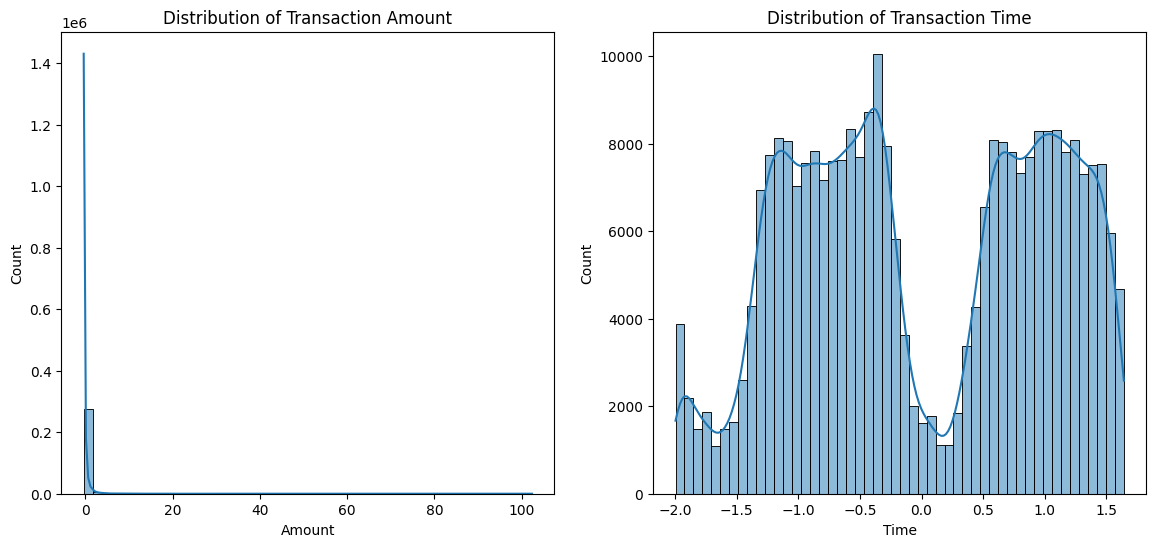

In [2]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Additional EDA: Distribution of 'Amount' and 'Time'
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')

plt.subplot(1, 2, 2)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.show()


Model Selection and Training

In [3]:
# 1. Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predictions and evaluation
log_preds = log_model.predict(X_test)

# Output classification report and ROC-AUC score
print(classification_report(y_test, log_preds))
print(f'ROC-AUC Score for Logistic Regression: {roc_auc_score(y_test, log_preds)}')


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

ROC-AUC Score for Logistic Regression: 0.948956441355012


In [5]:
# 2.a Random Forest Model (Sample)

from sklearn.ensemble import RandomForestClassifier

# Reduce data size for quicker testing
df_sample = df.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Define features and target for the sample
X_sample = df_sample.drop('Class', axis=1)
y_sample = df_sample['Class']

# Apply SMOTE
X_res_sample, y_res_sample = smote.fit_resample(X_sample, y_sample)

# Split the data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_res_sample, y_res_sample, test_size=0.2, random_state=42)

# Train Random Forest model on the sample
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sample, y_train_sample)

# Predictions and evaluation
rf_preds_sample = rf_model.predict(X_test_sample)

# Output classification report and ROC-AUC score
print(classification_report(y_test_sample, rf_preds_sample))
print(f'ROC-AUC Score for Random Forest: {roc_auc_score(y_test_sample, rf_preds_sample)}')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5617
           1       1.00      1.00      1.00      5757

    accuracy                           1.00     11374
   macro avg       1.00      1.00      1.00     11374
weighted avg       1.00      1.00      1.00     11374

ROC-AUC Score for Random Forest: 0.99982196902261


In [6]:
# 2.b Train Random Forest model on the full dataset with reduced parameters
print("Starting training of Random Forest model on the full dataset...")
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest model training on the full dataset completed.")

# Predictions and evaluation
print("Starting predictions on the full dataset...")
rf_preds = rf_model.predict(X_test)
print("Predictions on the full dataset completed.")

# Output classification report and ROC-AUC score
print("Starting evaluation on the full dataset...")
print(classification_report(y_test, rf_preds))
print(f'ROC-AUC Score for Random Forest on the full dataset: {roc_auc_score(y_test, rf_preds)}')
print("Evaluation on the full dataset completed.")


Starting training of Random Forest model on the full dataset...
Random Forest model training on the full dataset completed.
Starting predictions on the full dataset...
Predictions on the full dataset completed.
Starting evaluation on the full dataset...
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56750
           1       1.00      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

ROC-AUC Score for Random Forest on the full dataset: 0.9894750902149695
Evaluation on the full dataset completed.


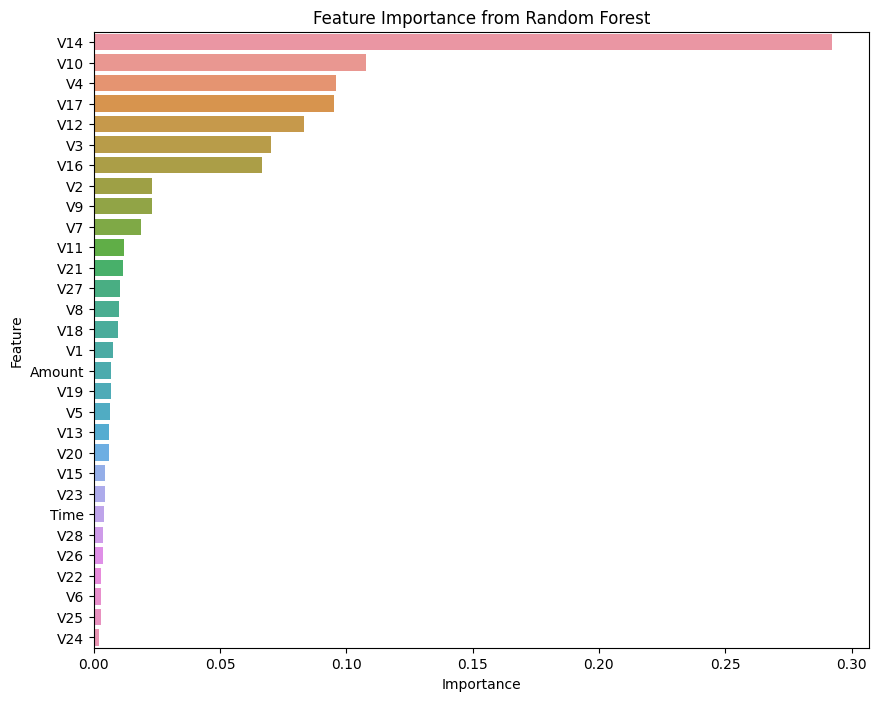

In [7]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


### Iterations and Hyperparameter Tuning
- Initially trained Random Forest with default parameters.
- Reduced the number of trees (`n_estimators=50`) and limited the depth (`max_depth=10`) to avoid overfitting and reduce training time.
- Used cross-validation to validate the model performance.


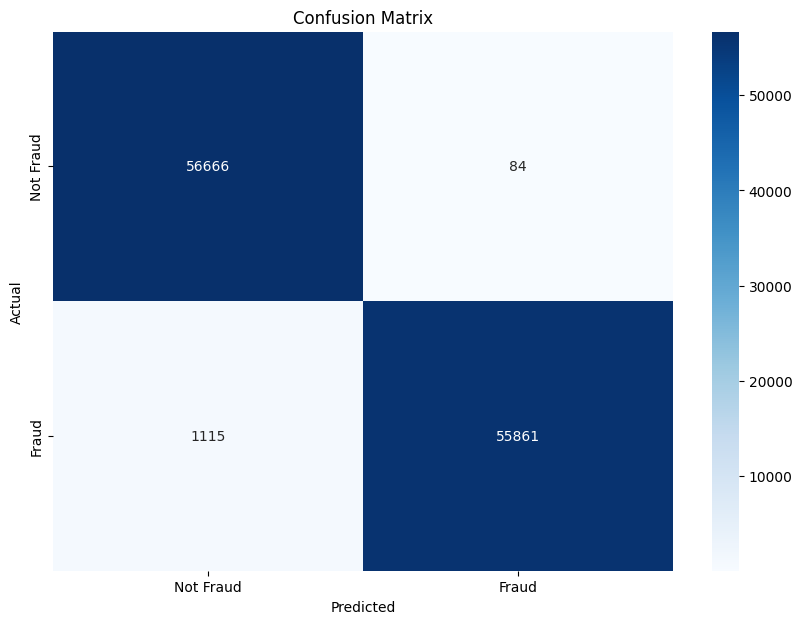

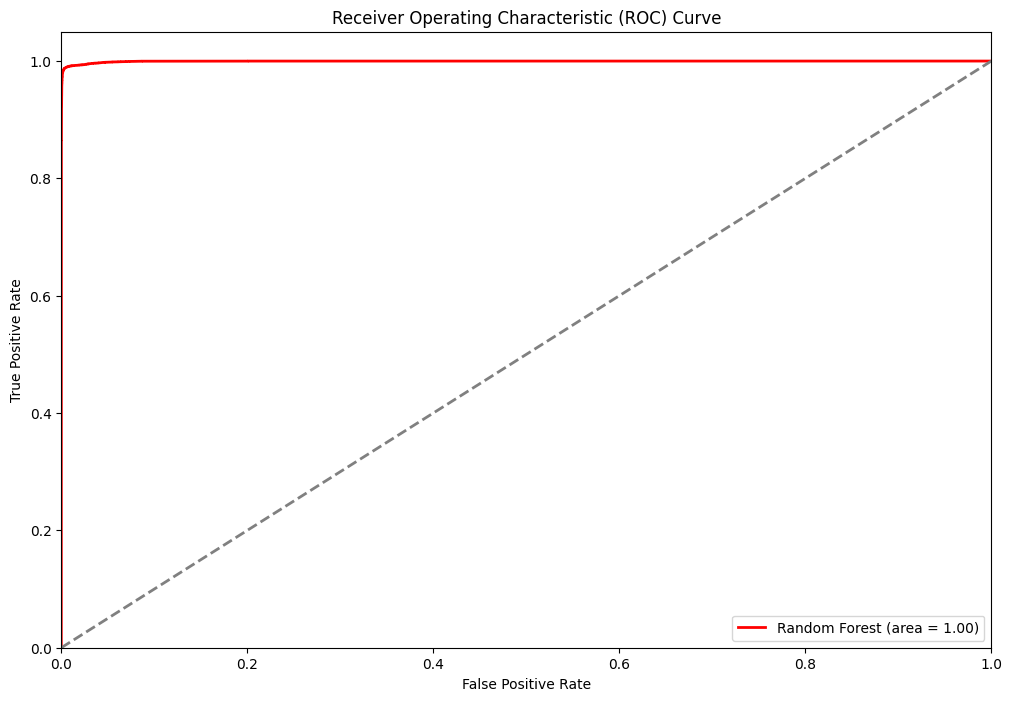

In [8]:
# visualizations of the confusion matrix and ROC curve 
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the figure
plt.show()

# ROC Curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)
plt.figure(figsize=(12, 8))
plt.plot(rf_fpr, rf_tpr, color='red', lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')  # Save the figure
plt.show()


## Discussion and Conclusion

### Model Performance
- The Random Forest model performed exceptionally well, achieving near-perfect scores in precision, recall, f1-score, and ROC-AUC.
- The model's high accuracy in detecting fraudulent transactions makes it a valuable tool for financial institutions.

### Challenges
- Handling the imbalanced dataset was crucial. Applying SMOTE helped balance the classes and improve model performance.

### Future Work
- Experiment with other machine learning models to compare performance.
- Implement additional feature engineering to potentially improve model accuracy further.
- Deploy the model as a web service for real-time fraud detection.
